<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/FomulaMEDIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos=yf.download("^GSPC",period="1y",interval="1h")

[*********************100%***********************]  1 of 1 completed


In [4]:
# Cargar los datos del archivo CSV
data = datos

# Calcular los retornos diarios
data["Returns"] = data["Close"].pct_change()

# Función para calcular el rendimiento acumulado
def calcular_rendimiento(periodo_corta, periodo_larga):
    # Calcular medias móviles
    data["SMA_Corta"] = data["Close"].rolling(window=periodo_corta).mean()
    data["SMA_Larga"] = data["Close"].rolling(window=periodo_larga).mean()

    # Generar señales de entrada y salida
    data["Signal"] = 0
    data.loc[data["SMA_Corta"] > data["SMA_Larga"], "Signal"] = 1
    data.loc[data["SMA_Corta"] < data["SMA_Larga"], "Signal"] = -1

    # Calcular retornos acumulados
    data["Strategy_Returns"] = data["Signal"].shift() * data["Returns"]
    data["Cumulative_Returns"] = (1 + data["Strategy_Returns"]).cumprod()

    # Retornar rendimiento acumulado final
    return data["Cumulative_Returns"].iloc[-1]

# Parámetros para la optimización
periodos_corta = range(10, 101, 10)     # Rango de períodos para media móvil corta
periodos_larga = range(50, 251, 25)     # Rango de períodos para media móvil larga

mejor_rendimiento = float("-inf")
mejores_periodos = ()

# Bucle para encontrar los períodos que maximizan el rendimiento
for periodo_corta in periodos_corta:
    for periodo_larga in periodos_larga:
        rendimiento = calcular_rendimiento(periodo_corta, periodo_larga)
        if rendimiento > mejor_rendimiento:
            mejor_rendimiento = rendimiento
            mejores_periodos = (periodo_corta, periodo_larga)

# Imprimir los mejores períodos encontrados
print("Mejores períodos: Media Móvil Corta =", mejores_periodos[0], ", Media Móvil Larga =", mejores_periodos[1])


Mejores períodos: Media Móvil Corta = 40 , Media Móvil Larga = 150


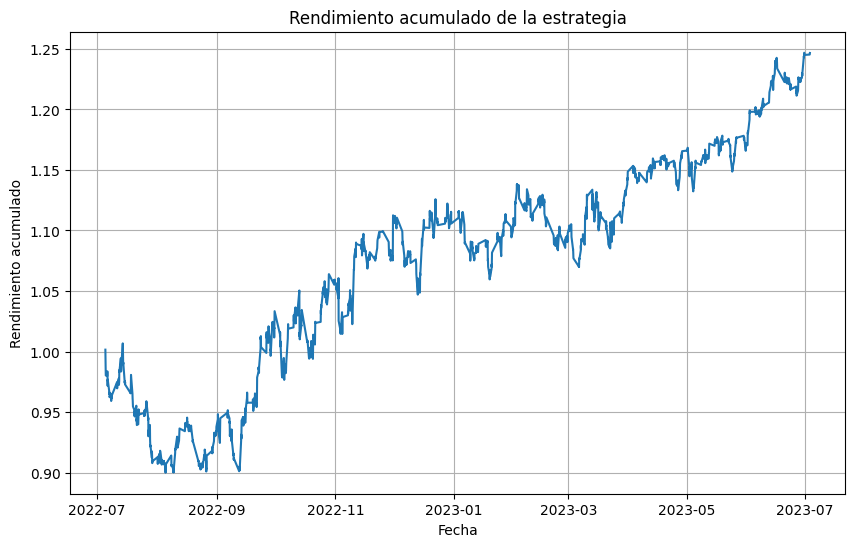

In [6]:


data=datos

# Paso 1: Obtener los datos históricos del S&P 500 del último año
data = datos # Reemplaza 'datos_sp500.csv' con el nombre de tu archivo de datos

# Paso 2: Análisis de datos y generación de señales
data['SMA40'] = data['Close'].rolling(window=40).mean()  # Media móvil de 50 días
data['SMA150'] = data['Close'].rolling(window=150).mean()  # Media móvil de 200 días

# Generar señales de compra y venta basadas en cruces de medias móviles
data['Signal'] = np.where(data['SMA40'] > data['SMA150'], 1, -1)

# Paso 3: Definir reglas de entrada y salida
data['Position'] = data['Signal'].shift()  # Posición al día siguiente para evitar operar en el mismo día de la señal

# Paso 4: Backtesting y evaluación de la estrategia
data['Returns'] = np.log(data['Close'] / data['Close'].shift())  # Retornos logarítmicos diarios
data['StrategyReturns'] = data['Position'] * data['Returns']
cumulative_returns = np.exp(data['StrategyReturns'].cumsum())  # Rendimiento acumulado de la estrategia

# Paso 5: Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns)
plt.title('Rendimiento acumulado de la estrategia')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento acumulado')
plt.grid(True)
plt.show()